In [ ]:
import os
import pandas as pd
import matplotlib_inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1.0 Data Importation and Preparation

In [4]:
mat_file_path = r"C:\Users\dolap\OneDrive\Documents\DOLAPO\data-analysis\student-performance\student-performance-analysis\files\student-mat.csv"
por_file_path = r"C:\Users\dolap\OneDrive\Documents\DOLAPO\data-analysis\student-performance\student-performance-analysis\files\student-por.csv"

In [5]:
df1 = pd.read_csv(mat_file_path, sep=";")
df2 = pd.read_csv(por_file_path, sep=";")

In [6]:
df1.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [7]:
df2.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel fre

#####   1.1 Add a column to distinguish each course (Mathematics & Portuguese)

In [ ]:
df1['subject'] = 'Math'
df2['subject'] = 'Portuguese'

##### 1.2 Concatenate the two subject's dataframe

In [ ]:
df_all = pd.concat([df1, df2], axis=0, ignore_index=True)

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [12]:
df_all

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,Portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,Portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,Portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,Portuguese


In [ ]:
# Checking for any missing values
print("Missing values:\n", df_all.isnull().sum())


Missing values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64


##### 1.3 Convert categorical columns to numerical values

In [ ]:

df_all['sex'] = df_all['sex'].map({'F': 0, 'M': 1})
df_all['address'] = df_all['address'].map({'U': 1, 'R': 0})

In [26]:
# Examining the correlations between G3 and other numerical features.
correlation = df_all.corr(numeric_only=True)['G3'].sort_values(ascending=False)
print("Top correlations with G3:\n", correlation)


Top correlations with G3:
 G3            1.000000
G2            0.910743
G1            0.809142
Medu          0.201472
studytime     0.161629
Fedu          0.159796
address       0.117696
famrel        0.054461
sex          -0.031472
absences     -0.045671
freetime     -0.064890
health       -0.080079
goout        -0.097877
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64


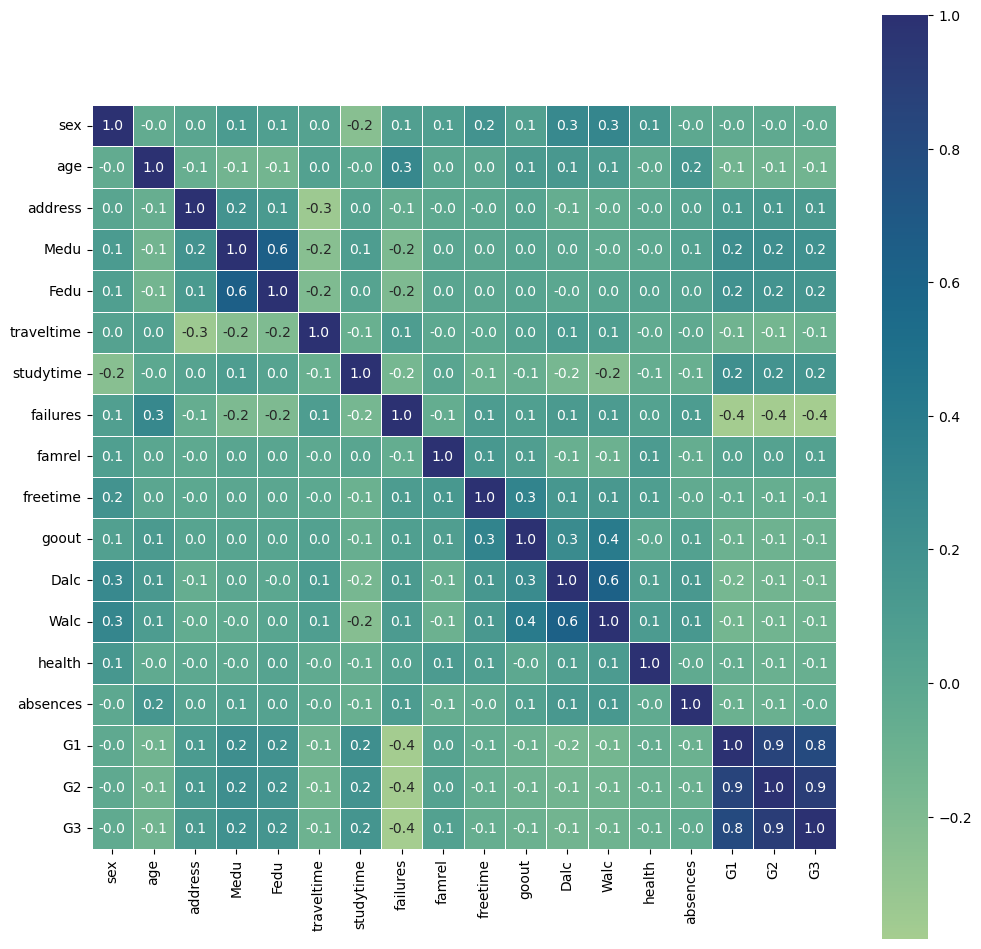

In [46]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_all.corr(numeric_only=True), cmap='crest', annot=True, fmt="0.1f", linewidths=0.5, cbar=True, square=True)
plt.show()

##### These grades are related with the course subject, Math or Portuguese:
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

In [16]:
# Group analysis
print(df_all.groupby('sex')['G3'].mean())  # Performance by gender
print(df_all.groupby('studytime')['G3'].mean())  # Performance by study time

sex
0    11.448393
1    11.203091
Name: G3, dtype: float64
studytime
1    10.580442
2    11.335984
3    12.493827
4    12.274194
Name: G3, dtype: float64


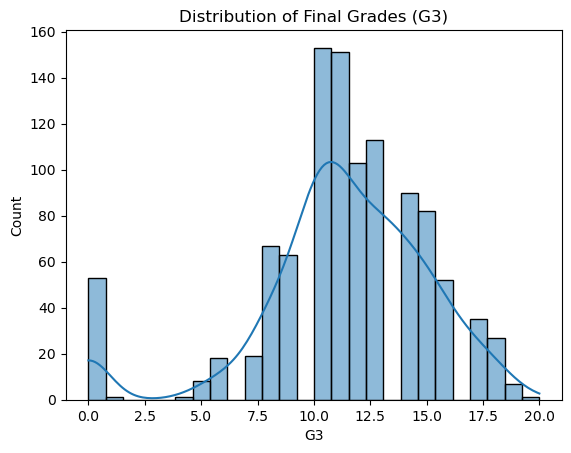

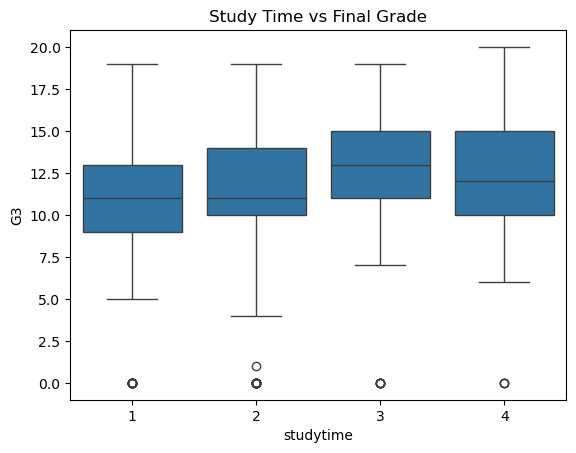

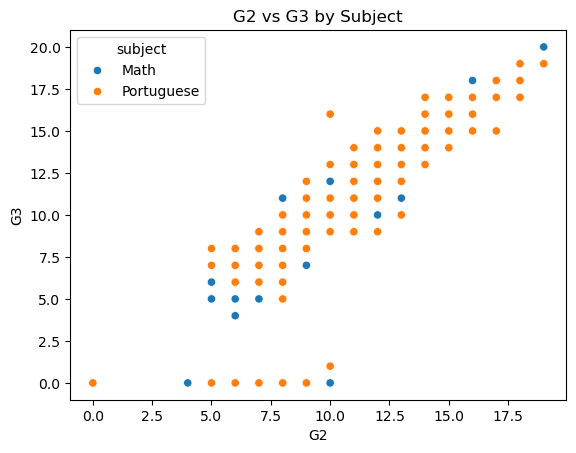

In [ ]:
# Histogram of G3
sns.histplot(df_all['G3'], kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.show()

# Boxplot of study time vs G3
sns.boxplot(data=df_all, x='studytime', y='G3')
plt.title('Study Time vs Final Grade')
plt.show()

# Scatter: G1 and G2 vs G3
sns.scatterplot(data=df_all, x='G2', y='G3', hue='subject')
plt.title('G2 vs G3 by Subject')
plt.show()


In [ ]:
# Select features and target
features = ['studytime', 'failures', 'absences', 'G1', 'G2']
X = df_all[features]
y = df_all['G3']

In [21]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:
# Predict
y_pred = model.predict(X_test)


In [25]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 1.73
R²: 0.81


##### Summary of Expected Outputs
| **Task**         | **Output**                                                                 |
|------------------|-----------------------------------------------------------------------------|
| Data Cleaning    | No major missing values; datasets merged with subject label                |
| EDA              | G1, G2, failures, and studytime show strong influence on G3                 |
| Visualizations   | Clear relationships between prior grades, study habits, and G3              |
| Model            | Linear regression gives solid baseline (R² ~ 0.8+)                          |